Name: Prasad D. Amale
PRN: 230340325035
Topic: Fraud Detection Case Study


In [111]:
import numpy as np
import pandas as pd

Importing the necessary Libraries

In [112]:
df = pd.read_csv('Fraud.csv')
print(df.shape)

(6362620, 11)


 Checking the Shape of Data

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


 df.info( ) gives us following information
1) The DataFrame contains 11 columns.
2) 3 columns have int64 data type.
3) 5 columns have float64 data type.
4) 3 columns have object data type.
5) The DataFrame's memory usage is approximately 534.0+ MB.


In [114]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


 df.describe() command gives,
1) Statistical Analysis of continuos variables
2) Like Mean, Standard Deviation, Range, etc.

In [115]:
null_count = df.isnull().sum()
null_percentage = round((df.isnull().sum() / df.shape[0]) * 100, 2)
null_percentage_sorted = null_percentage.sort_values(ascending=False)
null_percentage_sorted

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

 Finding out the Null Values and their percentage in each column, we are not having any null values in this dataset.

In [116]:
import seaborn as sns
from matplotlib import pyplot as plt

Importing Required Libraries for plotting graph

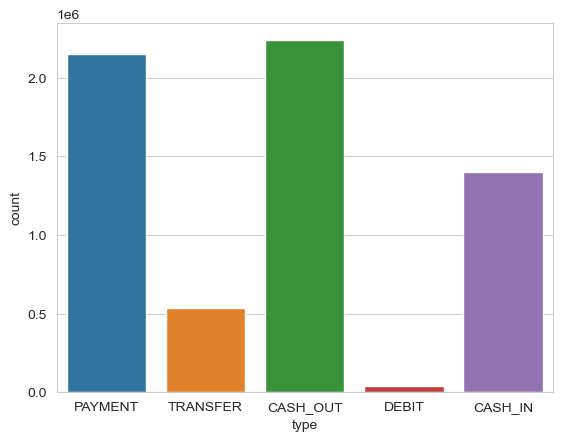

In [117]:
sns.countplot(data=df,x='type')
plt.show()

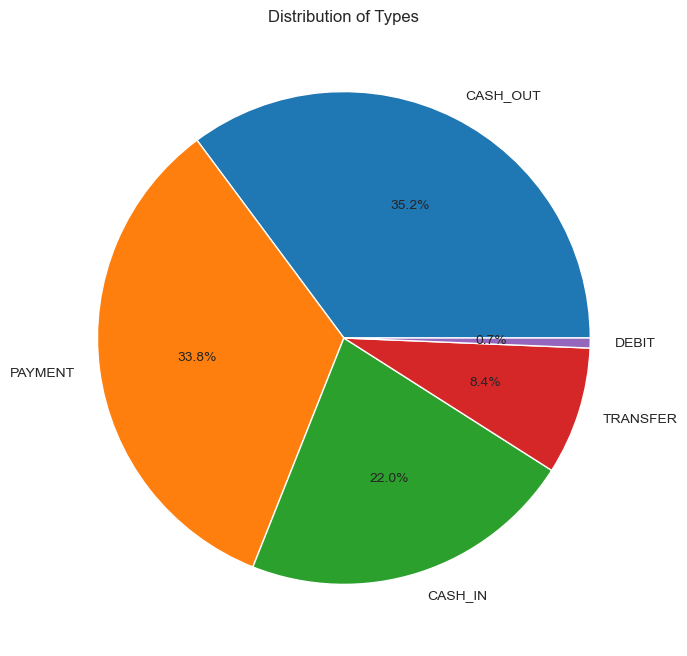

In [118]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(8, 8)) 
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Types')
plt.show()

 In this Command, we have understood that, 
1) Distribution of Payment and Cash out is maximum.
2) People are preferring Payment type and Cashout type on larger basis as their Transaction medium

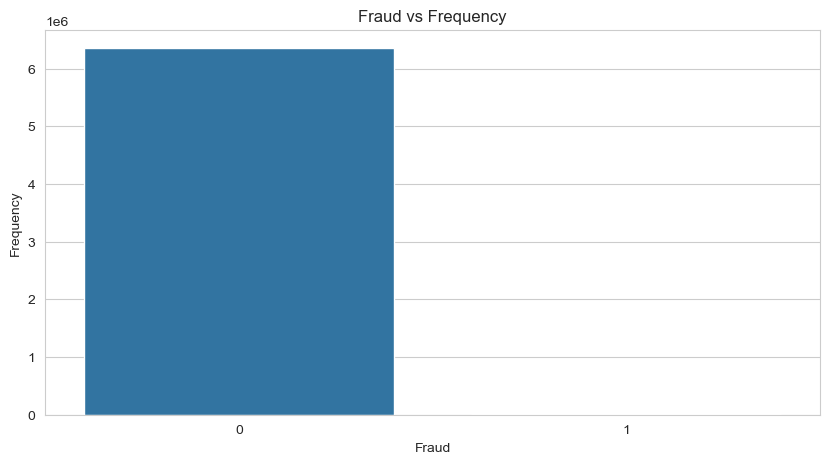

In [119]:
# Countplot of 'isFraud'
plt.figure(figsize=(10,5))
plt.title('Fraud vs Frequency')
sns.countplot(data=df,x='isFraud')
plt.xlabel('Fraud')
plt.ylabel('Frequency')
plt.show()

In [120]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [121]:
print("No Frauds:",df['isFraud'].value_counts()[0]/len(df['isFraud'])*100)
print("Frauds:",df['isFraud'].value_counts()[1]/len(df['isFraud'])*100)

No Frauds: 99.87091795518198
Frauds: 0.12908204481801522


 From above Diagrams/Plots we can Predict that,
1) There are maximum cases of No fraud
2) Data is highly imbalance

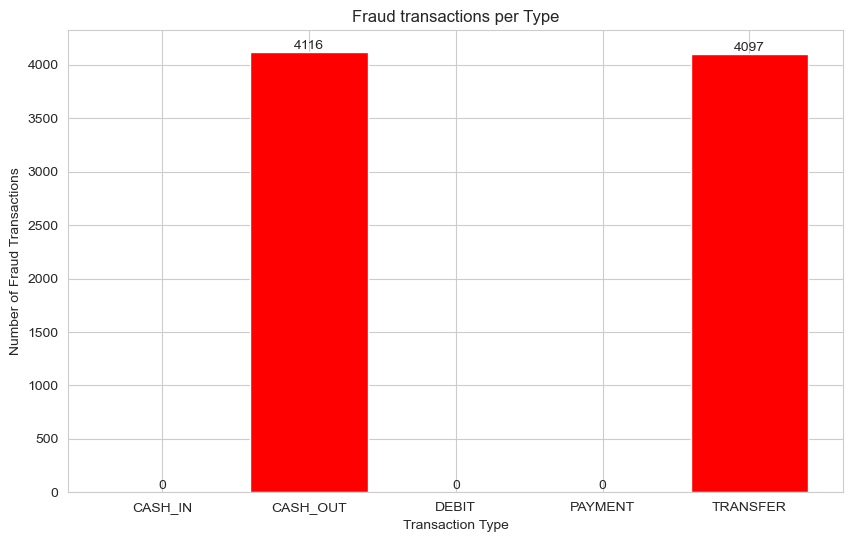

In [122]:
fraud_trans_type = df.groupby('type')['isFraud'].sum().reset_index()
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.bar(fraud_trans_type['type'], fraud_trans_type['isFraud'], color='Red')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Fraud Transactions')
plt.title('Fraud transactions per Type')
for index, value in enumerate(fraud_trans_type['isFraud']):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

1)	From above graph we can conclude, that fraud happening prominiently in Cash_out and Transfer Payment methods.
2)	The counts of frauds in Cash_out and Transfer payment methods are 4116 and 4097 respectively. 


In [123]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

Converting the Datatype of 'type' column from object to Numerical so we can use it as predictor while making model

In [124]:
col_obj = df[['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
col_obj

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.00,160296.36,0.00,0.00
1,1,3,1864.28,21249.00,19384.72,0.00,0.00
2,1,4,181.00,181.00,0.00,0.00,0.00
3,1,1,181.00,181.00,0.00,21182.00,0.00
4,1,3,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00


In [125]:
col_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
dtypes: float64(5), int32(1), int64(1)
memory usage: 315.5 MB


Created new Dataframe col_obj and include all the columns which are having numerial values, just to find out the VIF

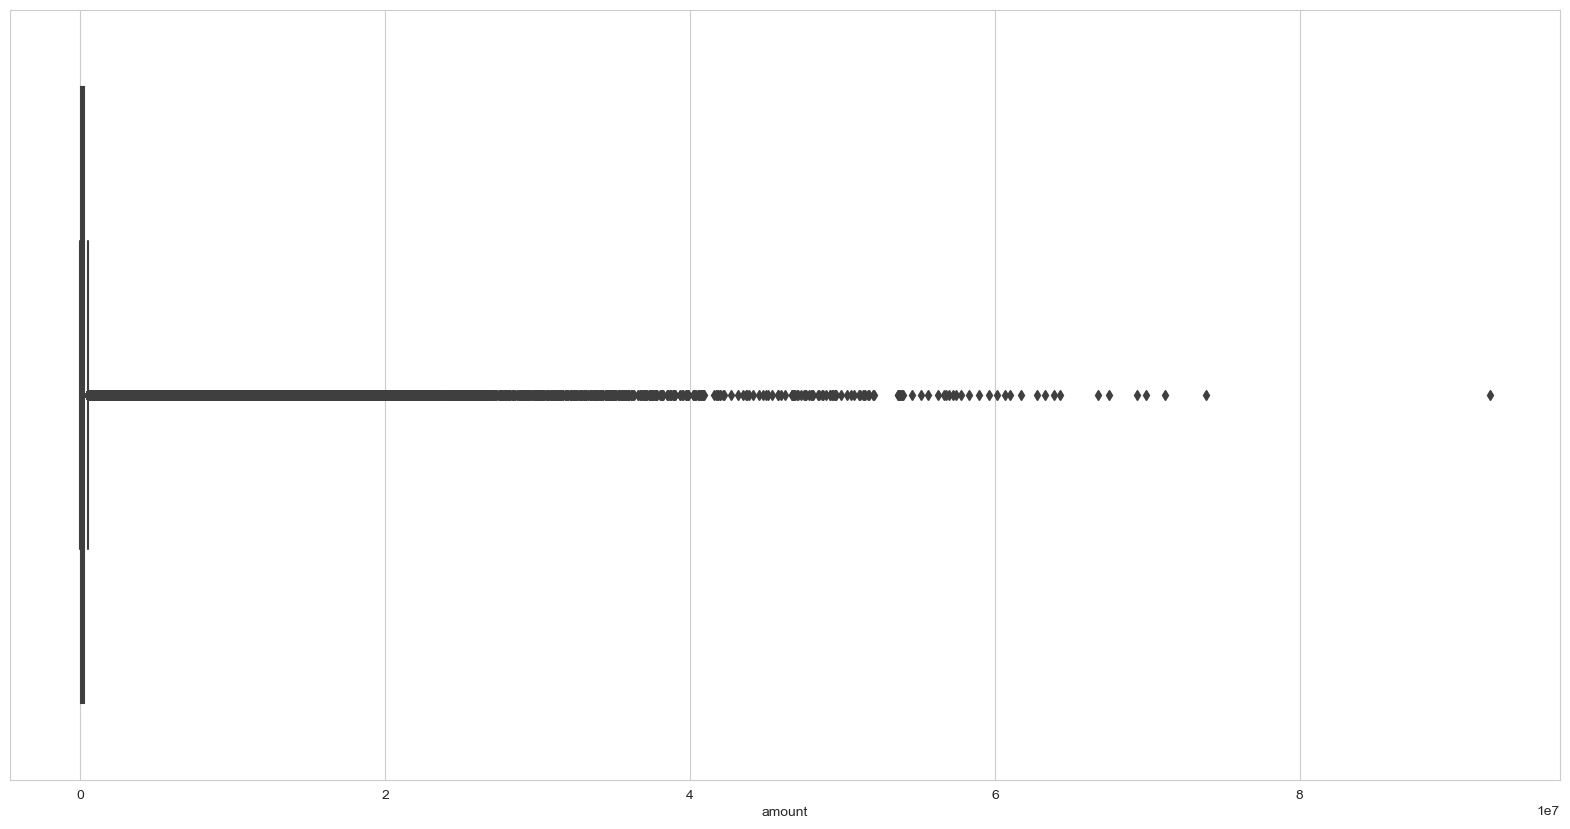

In [126]:
plt.figure(figsize=(20,10))
sns.boxplot(x=col_obj['amount'])
plt.show()

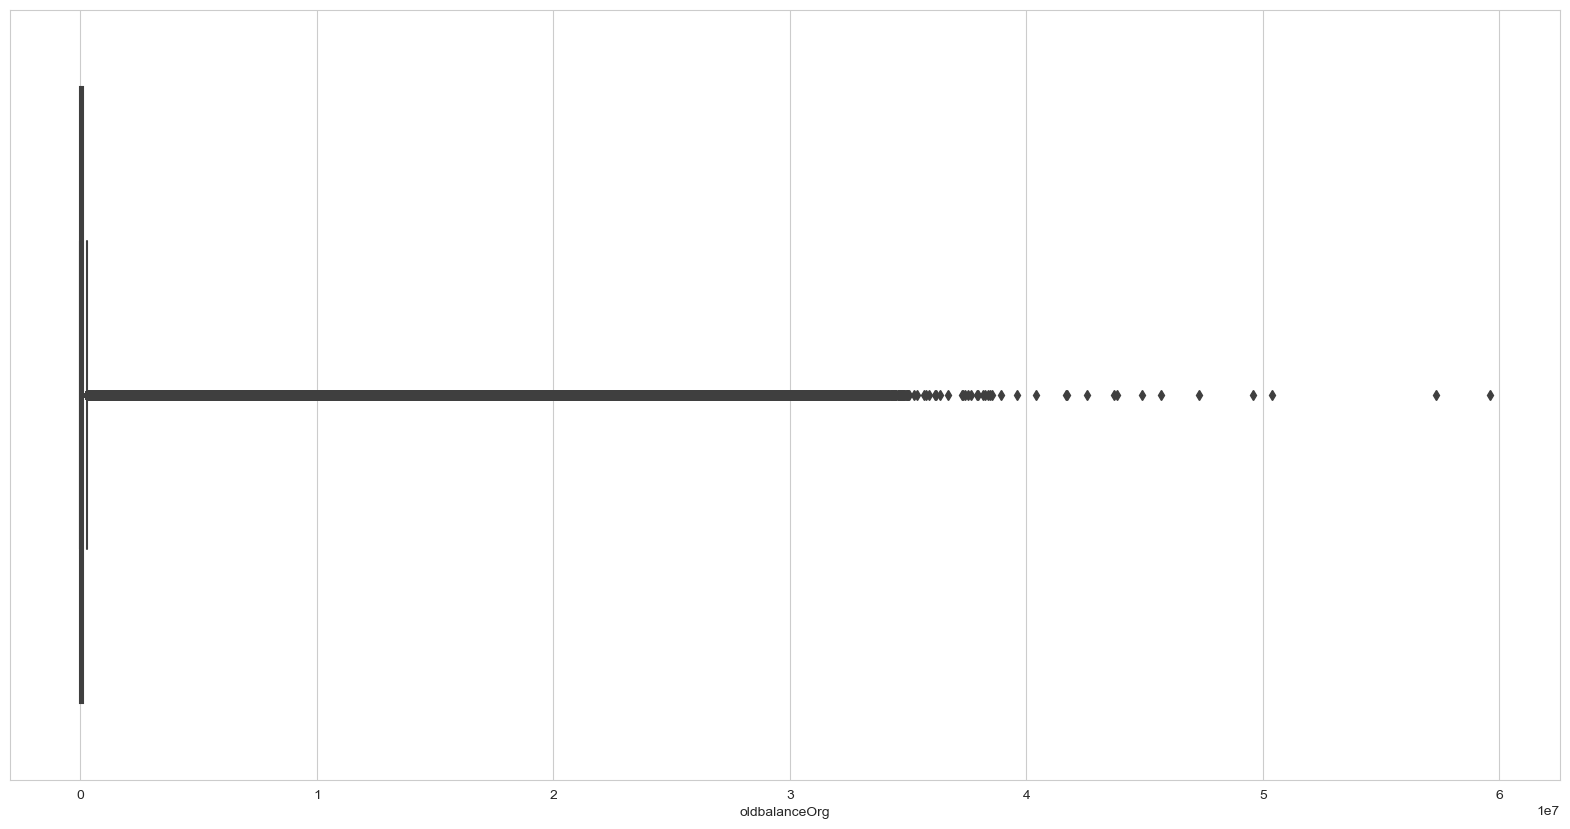

In [127]:
plt.figure(figsize=(20,10))
sns.boxplot(x=col_obj['oldbalanceOrg'])
plt.show()

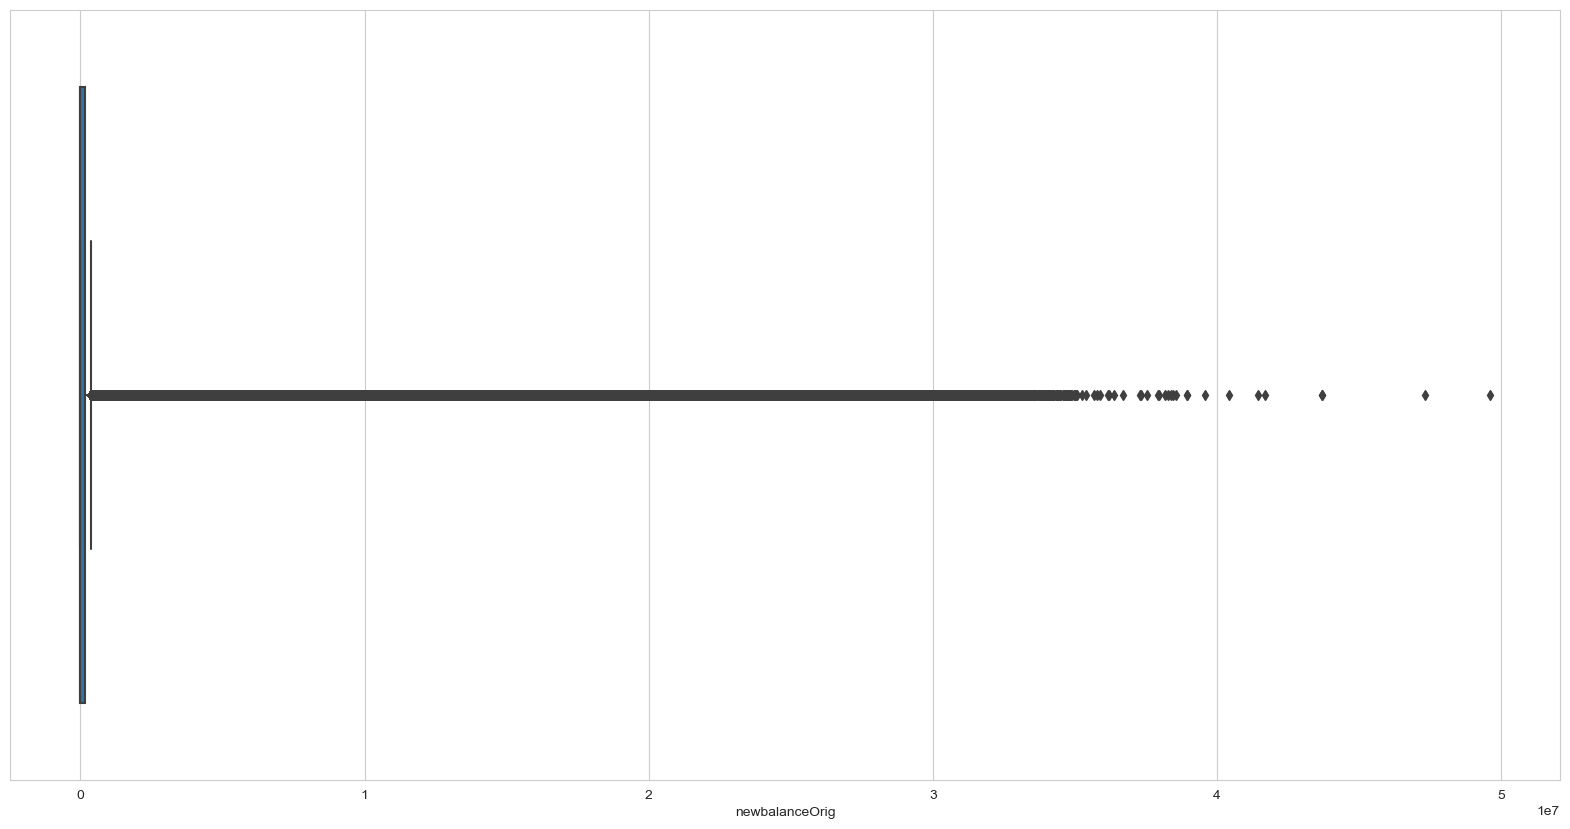

In [128]:
plt.figure(figsize=(20,10))
sns.boxplot(x=col_obj['newbalanceOrig'])
plt.show()

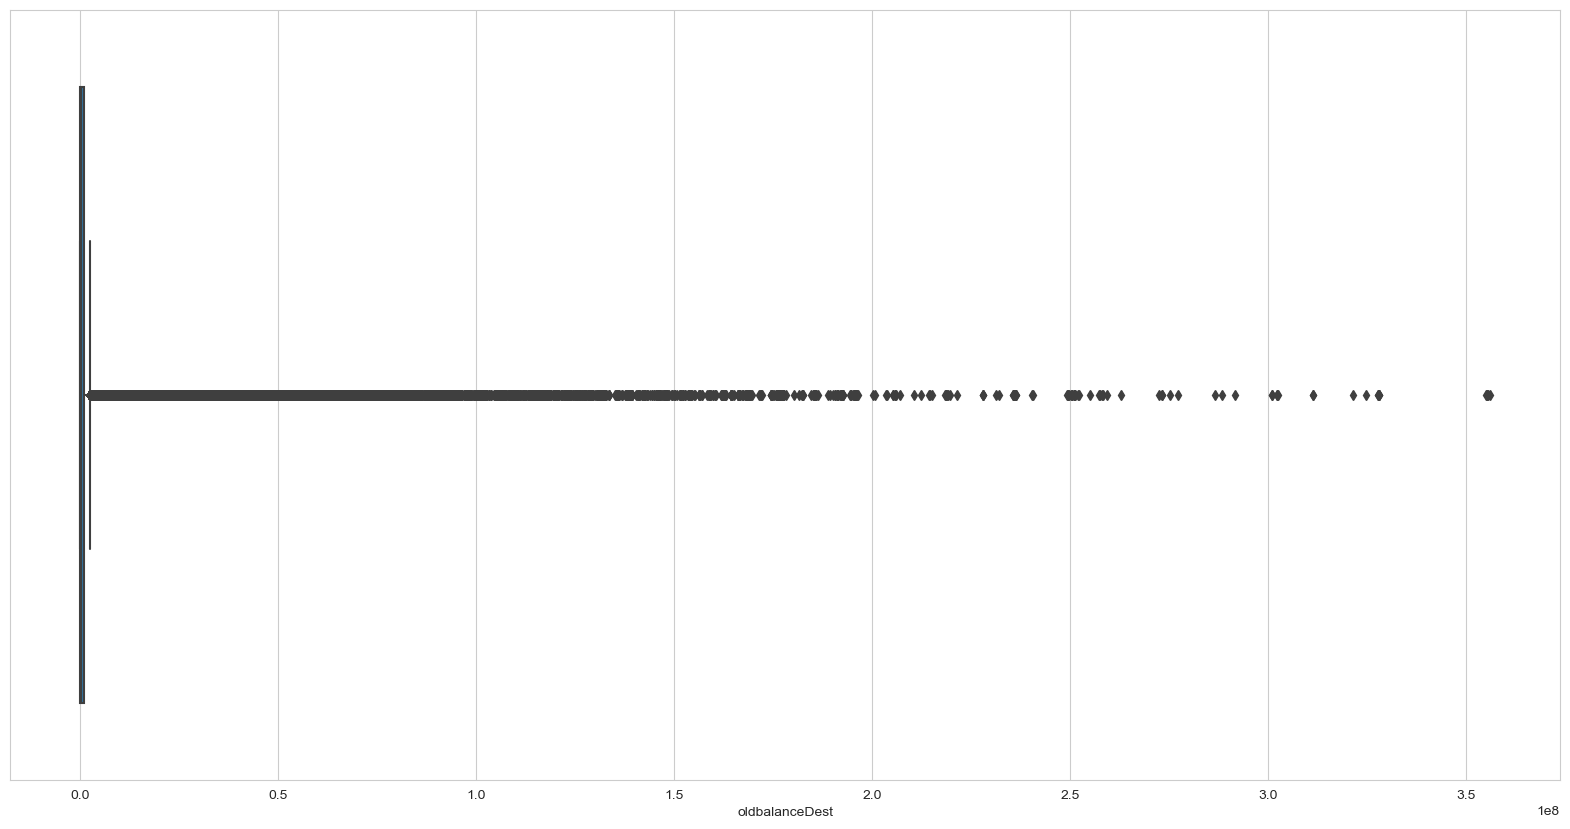

In [129]:
plt.figure(figsize=(20,10))
sns.boxplot(x=col_obj['oldbalanceDest'])
plt.show()

<AxesSubplot:xlabel='newbalanceDest'>

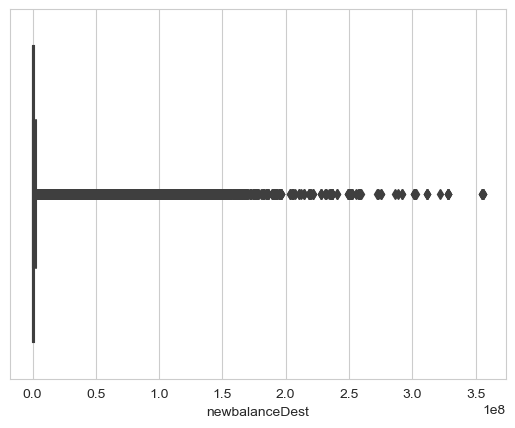

In [130]:
sns.boxplot(x=col_obj['newbalanceDest'])

 From above boxplot, we can conclude that there are outliers present in our data.

In [131]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler( )
col_obj=sc.fit_transform(col_obj)
col_obj = pd.DataFrame(col_obj)

In [132]:
col_obj.rename(columns={col_obj.columns[0]: 'step', col_obj.columns[1]: 'type',col_obj.columns[2]: 'amount',col_obj.columns[3]: 'oldbalanceOrg',col_obj.columns[4]: 'newbalanceOrig',col_obj.columns[5]: 'oldbalanceDest',col_obj.columns[6]: 'newbalanceDest'}, inplace=True)

<AxesSubplot:>

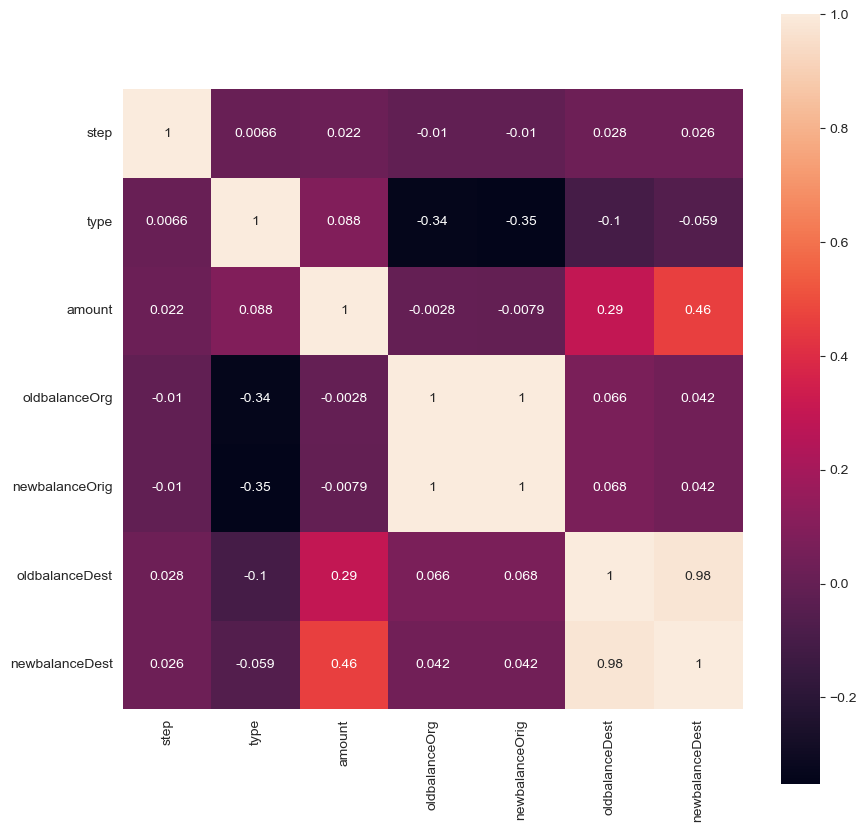

In [133]:
plt.figure(figsize=(10,10))
sns.heatmap(col_obj.corr(),annot=True,square=True)

In [134]:
col_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            float64
 1   type            float64
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
dtypes: float64(7)
memory usage: 339.8 MB


In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
print(variance_inflation_factor(col_obj.values,0))  #1.0024428655928515
print(variance_inflation_factor(col_obj.values,1)) #1.2681769595352792
print(variance_inflation_factor(col_obj.values,2)) #3.7135035676156494
print(variance_inflation_factor(col_obj.values,3)) #459.0687715634811
print(variance_inflation_factor(col_obj.values,4)) #464.18060086641555
print(variance_inflation_factor(col_obj.values,5)) #65.9509123194738
print(variance_inflation_factor(col_obj.values,6))  #75.7739726894426


1.0024428655928517
1.268176959535279
3.7135035676156494
459.0687715634811
464.18060086641555
65.9509123194738
75.7739726894426


1)	During these steps we have calculated the Variance Inflation Factor of the predictors on each other.
2)	Before doing this, we have converted the  datatype of ‘type’ column from object to numerical using the label encoder.
3)	On further understanding we found out that, column ‘oldbalanceOrg’ and ‘newbalanceOrig’ shares the highest VIF.
4)	But unfortunately we can drop these column
5)	So in further steps we have adjusted the VIF.


In [136]:
df['Actual_amount_orig'] = df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df['Actual_amount_dest'] = df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)

Adjusting the VIF, by transforming 4 columns into 2

In [137]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [138]:
df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

Dropping the columns from main dataframe after transformation

In [139]:
df.head()

,step,type,amount,isFraud,Actual_amount_orig,Actual_amount_dest
0,1,3,9839.64,0,9839.64,0.0
1,1,3,1864.28,0,1864.28,0.0
2,1,4,181.00,1,181.00,0.0
3,1,1,181.00,1,181.00,21182.0
4,1,3,11668.14,0,11668.14,0.0


In [140]:
x = df.drop('isFraud',axis=1)
y = df['isFraud']

Formation of Independent and Dependent Variables for Model training and testing

In [141]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler( )
x=sc.fit_transform(x)
x= pd.DataFrame(x)

In [142]:
print(x.head())

          0         1         2         3         4
0 -1.703042  0.952399 -0.281560  0.211876  0.152896
1 -1.703042  0.952399 -0.294767  0.157490  0.152896
2 -1.703042  1.693076 -0.297555  0.146011  0.152896
3 -1.703042 -0.528954 -0.297555  0.146011  0.178952
4 -1.703042  0.952399 -0.278532  0.224345  0.152896


In [143]:

x.rename(columns={x.columns[0]: 'step', 
                   x.columns[1]: 'type',
                   x.columns[2]: 'amount',
                   x.columns[3]: 'Actual_amount_orig',
                   x.columns[4]: 'Actual_amount_orig',
                   }, inplace=True)


Renamed Independent Columns, after using the Standard Scalar on x, their column names are assign as column index

In [144]:
print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 5 columns):
 #   Column              Dtype  
---  ------              -----  
 0   step                float64
 1   type                float64
 2   amount              float64
 3   Actual_amount_orig  float64
 4   Actual_amount_orig  float64
dtypes: float64(5)
memory usage: 242.7 MB
None


In [145]:
print(type(x))
print(type(y))
y = pd.DataFrame(y)
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


checking the Datatypes before procedding to calculate VIF

In [146]:

print(variance_inflation_factor(x.values,0))  
print(variance_inflation_factor(x.values,1)) 
print(variance_inflation_factor(x.values,2)) 
print(variance_inflation_factor(x.values,3)) 
print(variance_inflation_factor(x.values,4)) 



1.001760659028652
1.1574966923241674
3.5694615722339087
1.151785255784114
3.676009971165729


VIF of Independent Variables are withing Range, so we can proceed for model building

In [147]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)


Splitting the data into train and test for model building and testing

# Prediction using Logistic Regression

In [148]:

from sklearn.linear_model import LogisticRegression
logisticmodel = LogisticRegression()
logisticmodel.fit(x_train,y_train)


c:\Users\rushi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [149]:
y_logistic = logisticmodel.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_logistic))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906290
           1       0.89      0.45      0.60      2496

    accuracy                           1.00   1908786
   macro avg       0.95      0.73      0.80   1908786
weighted avg       1.00      1.00      1.00   1908786



In [150]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_logistic))

[[1906151     139]
 [   1362    1134]]


In [151]:
from sklearn.metrics import precision_score
logistic_precision = precision_score(y_test,y_logistic)
print(logistic_precision)

0.8908091123330715


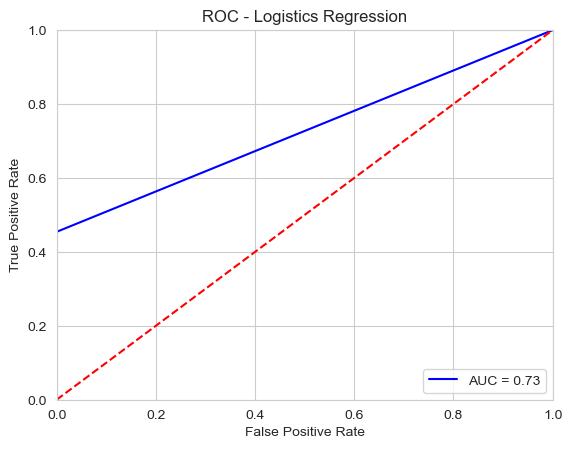

In [185]:

from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test,y_logistic)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC - Logistics Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


After performing Logistic Regression,
1) Precision Score to Found Fraud is 0.89
2) Recall values is 0.46
3) Area under curve is 0.73

# Prediction using Decision Tree 

In [153]:
from sklearn.tree import DecisionTreeClassifier as dt
decisiontreemodel = dt(criterion='entropy')
decisiontreemodel.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [154]:
y_decision_tree = decisiontreemodel.predict(x_test)
y_decision_tree

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [155]:
print(classification_report(y_test,y_decision_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906290
           1       0.80      0.78      0.79      2496

    accuracy                           1.00   1908786
   macro avg       0.90      0.89      0.90   1908786
weighted avg       1.00      1.00      1.00   1908786



In [156]:
print(confusion_matrix(y_test,y_decision_tree))

[[1905818     472]
 [    553    1943]]


In [157]:
from sklearn.metrics import precision_score
y_decision_tree_precision = precision_score(y_test,y_decision_tree)
print(y_decision_tree_precision)

0.8045548654244307


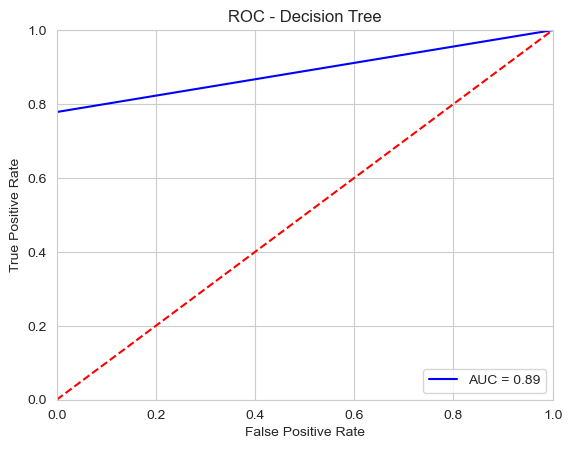

In [186]:

from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test,y_decision_tree)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC - Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

After performing Decision Tree(Entropy),
1) Precision Score to Found Fraud is 0.80
2) Recall values is 0.78
3) Area under curve is 0.89

In [159]:
decisiontreemodel1 = dt(criterion='gini')  # Change criterion to 'gini'
decisiontreemodel1.fit(x_train, y_train)

DecisionTreeClassifier()

In [160]:
y_decision_tree1 = decisiontreemodel1.predict(x_test)
y_decision_tree1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [161]:
print(classification_report(y_test,y_decision_tree1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906290
           1       0.78      0.77      0.78      2496

    accuracy                           1.00   1908786
   macro avg       0.89      0.89      0.89   1908786
weighted avg       1.00      1.00      1.00   1908786



In [162]:
print(confusion_matrix(y_test,y_decision_tree1))

[[1905758     532]
 [    566    1930]]


In [163]:
from sklearn.metrics import precision_score
y_decision_tree1_precision = precision_score(y_test,y_decision_tree1)
print(y_decision_tree1_precision)

0.7839155158407799


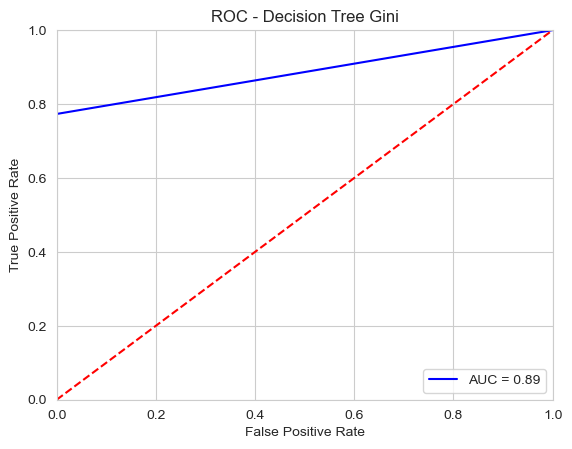

In [187]:

from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test,y_decision_tree1)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC - Decision Tree Gini')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

After performing Decision Tree(Gini),
1) Precision Score to Found Fraud is 0.79
2) Recall values is 0.78
3) Area under curve is 0.89

# Prediction using Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20,criterion="entropy")
rfmodel = rf.fit(x_train,y_train)
y_predrf = rfmodel.predict(x_test)

C:\Users\rushi\AppData\Local\Temp\ipykernel_26256\62524516.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfmodel = rf.fit(x_train,y_train)


In [166]:
print(classification_report(y_test,y_predrf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906290
           1       0.96      0.74      0.84      2496

    accuracy                           1.00   1908786
   macro avg       0.98      0.87      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786



In [167]:
print(confusion_matrix(y_test,y_predrf))

[[1906222      68]
 [    638    1858]]


In [168]:
from sklearn.metrics import precision_score
y_random_forest_precision = precision_score(y_test,y_predrf)
print(y_random_forest_precision)

0.9646936656282451


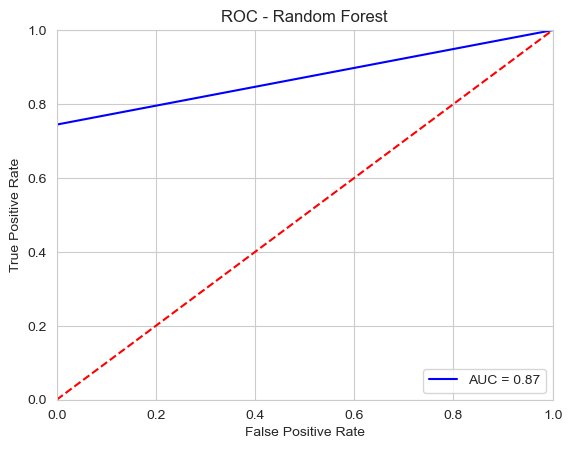

In [188]:

from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test,y_predrf)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC - Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

After performing Random Forest,
1) Precision Score to Found Fraud is 0.96
2) Recall values is 0.74
3) Area under curve is 0.87

# Prediction using KNN

In [170]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knnmodel = knn.fit(x_train,y_train)
yknn = knnmodel.predict(x_test)

c:\Users\rushi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [171]:
print(classification_report(y_test,yknn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906290
           1       0.92      0.69      0.79      2496

    accuracy                           1.00   1908786
   macro avg       0.96      0.84      0.89   1908786
weighted avg       1.00      1.00      1.00   1908786



In [172]:
print(confusion_matrix(y_test,yknn))

[[1906135     155]
 [    774    1722]]


In [173]:
from sklearn.metrics import precision_score
yknn_precision = precision_score(y_test,yknn)
print(yknn_precision)

0.9174214171550347


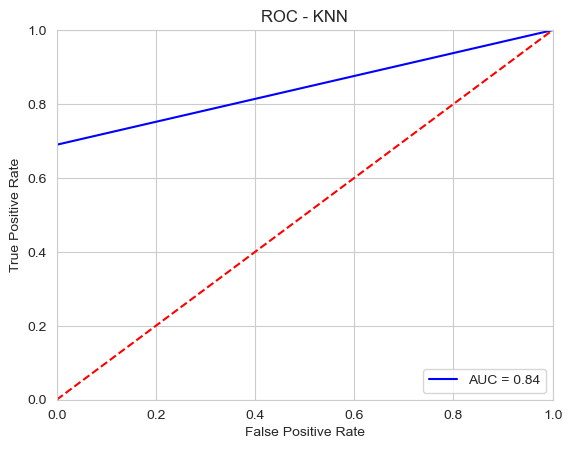

In [189]:

from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test,yknn)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC - KNN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

After performing KNN,
1) Precision Score to Found Fraud is 0.92
2) Recall values is 0.70
3) Area under curve is 0.85

# Prediction using AdaBoost

In [175]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(n_estimators=30)
adaboost_model.fit(x_train,y_train)
y_adaboost = adaboost_model.predict(x_test)

c:\Users\rushi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [176]:
print(classification_report(y_test,y_adaboost))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906290
           1       0.90      0.49      0.63      2496

    accuracy                           1.00   1908786
   macro avg       0.95      0.74      0.82   1908786
weighted avg       1.00      1.00      1.00   1908786



In [177]:
from sklearn.metrics import precision_score
yadaboost_precision = precision_score(y_test,y_adaboost)
print(yadaboost_precision)

0.9023668639053254


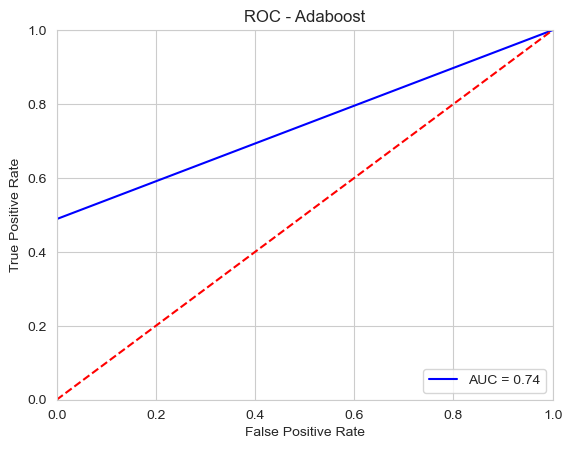

In [190]:

from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test,y_adaboost)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC - Adaboost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

After performing Adaboost,
1) Precision Score to Found Fraud is 0.93
2) Recall values is 0.48
3) Area under curve is 0.74

In [179]:
l2 = [logistic_precision,y_decision_tree_precision,
y_decision_tree1_precision,
y_random_forest_precision,
yknn_precision,yadaboost_precision
]

In [180]:
l2 = pd.DataFrame(l2)
l2

,0
0,0.890809
1,0.804555
2,0.783916
3,0.964694
4,0.917421
5,0.902367


In [183]:
data = {
    'Precision': [0.890809, 0.804555, 0.783916, 0.964694, 0.917421,0.902367]
}

index_names = [
    'y_logistic_precision_fraud',
    'y_decision_tree_precision_entropy_fraud',
    'y_decision_tree1_precision_gini_fraud',
    'y_random_forest_precision_fraud',
    'yknn_precision_fraud',
    'yadaboost_precision'

]

# Create the DataFrame
l2 = pd.DataFrame(data)

# Rename the index or row labels
l2 = l2.rename(index=dict(enumerate(index_names)))

print(l2)

                                         Precision
y_logistic_precision_fraud                0.890809
y_decision_tree_precision_entropy_fraud   0.804555
y_decision_tree1_precision_gini_fraud     0.783916
y_random_forest_precision_fraud           0.964694
yknn_precision_fraud                      0.917421
yadaboost_precision                       0.902367


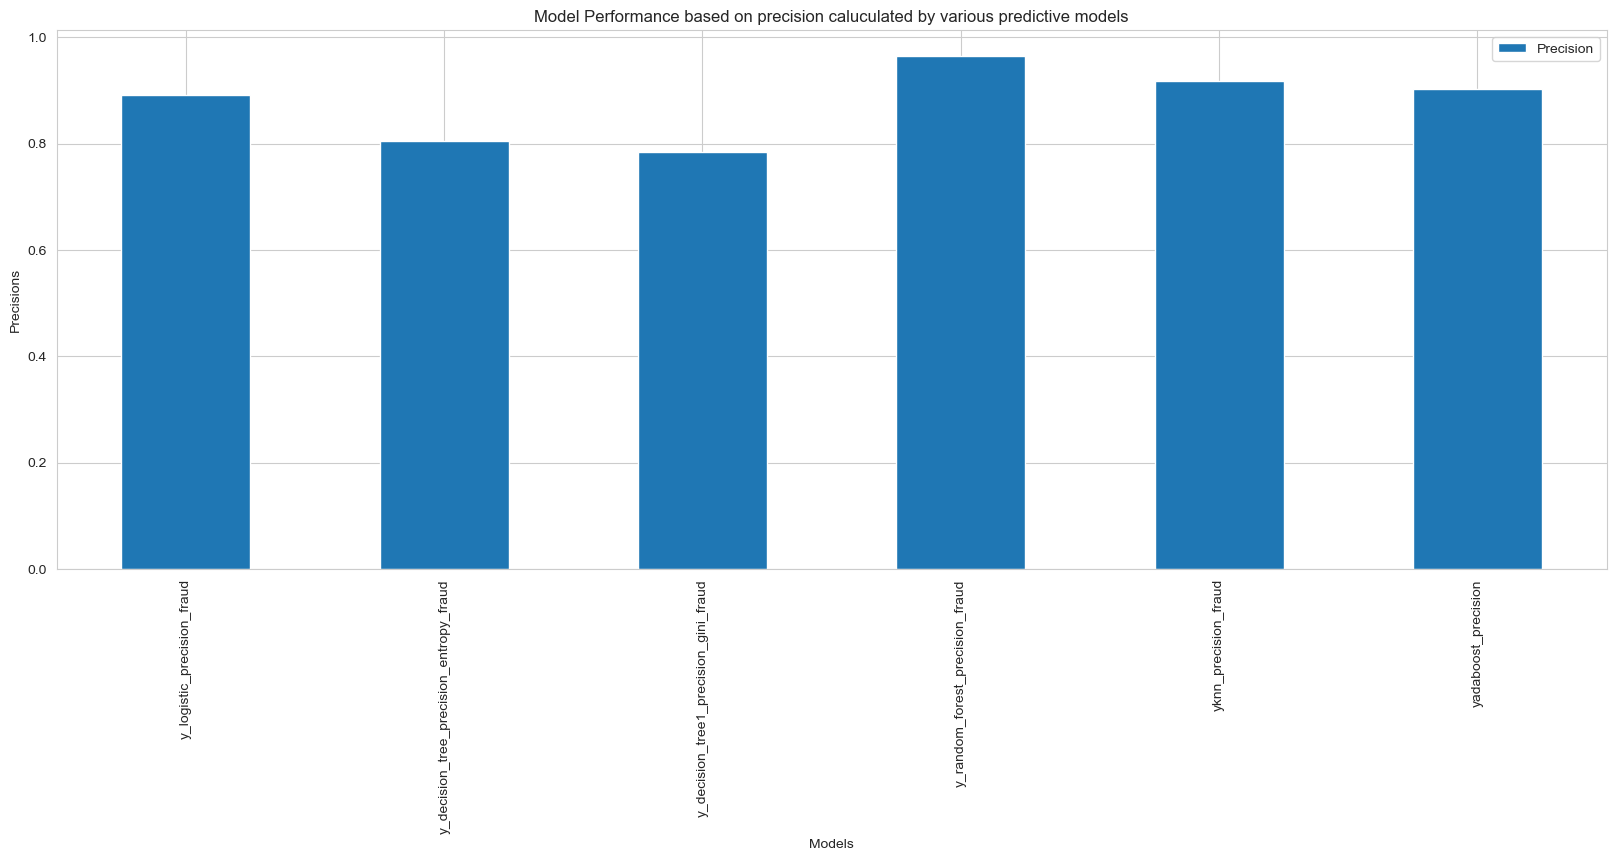

In [184]:
l2.plot.bar(figsize=(20,7))
plt.xlabel('Models')
plt.ylabel('Precisions')
plt.title('Model Performance based on precision caluculated by various predictive models')
plt.show()

From Above Graph, we can conclude that above all of this, Random Forest has the highest Precision(0.96) value with Good Area under curve(0.87) for identifying Frauds.